### Justin Butler
### Population Project
### USA Data

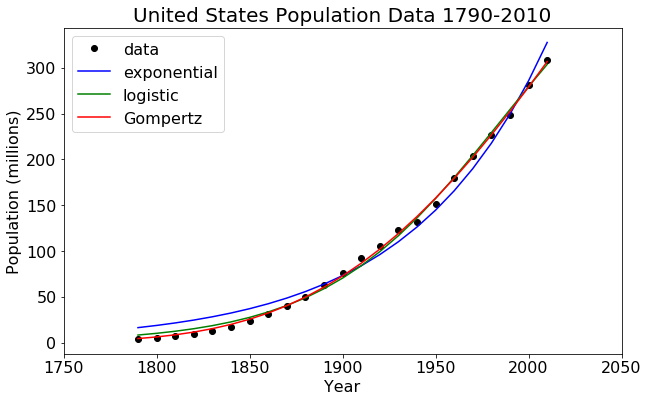

expR2 =  0.985918115979
logR2 =  0.997520321806
gompR2 =  0.999028317321
Adjusted Exp R2 =  0.984509927577
Adjusted Log R2 =  0.997128793671
Adjusted Gomp R2 =  0.99887489374

Exponential estimation for 2010: 7.20562890294e+14
Logistic estimation for 2010: 444.189138618
Gompertz estimation for 2010: 1274.68060697


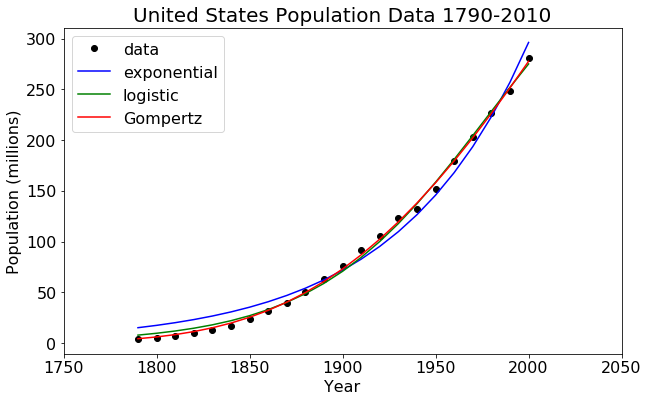

In [22]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#--------------------------------------------------
# Read and scale US Population Data.
#--------------------------------------------------
CensusFile = open('USPopulation.csv', 'r') #Don't you dare overwrite this file!
N = 23 # number of data points
i = 0
j = 0
USYears = np.zeros([N], dtype=int)
USPop0 = np.zeros([N], dtype=int)
for line in CensusFile:
    if i == 0 or i==1:
        i=i+1
    else:
        values = line.split(',')
        USYears[j] = int(values[0])
        USPop0[j] = int(values[1])
        j = j+1
        i = i+1

CensusFile.close()
USPop = USPop0/1.e6 #population as a floating point number in millions

#----------------------------------
# Find the PPGR and PolyFit values
#----------------------------------

#Declare the array to store my PPGR values
M = N-2 #number of data points - since the two end points aren't between two points
PPGR = np.zeros([M])

#This for loop will find the PPGR between any two points with one point between them.
for k in range(21):
    PPGR[k] =  (1/USPop[k+1])*((USPop[k+2]-USPop[k])/(USYears[k+2]-USYears[k]))
    k = k+1

#Caluculate the average of all of the values just generated
avgPPGR = np.average(PPGR)

#Time to start making the best fit line. First we will use np.polyfit to find the slope and y-intercept of the line
USPopLineCoef = np.polyfit(USPop[1:N-1],PPGR,1)

#If something seems weird, uncomment the next line to view the line coefficients
#print (USPopLineCoef)

#Next, I will use the values of USPop as my x-values for a function of the best fit line
USPopLine = USPopLineCoef[0]*USPop + USPopLineCoef[1]


#------------------------------------------------------------------------------------------
# Time to make the functions of our models
#------------------------------------------------------------------------------------------

#Exponential model
def US_exp(t,P0,r):
    P = P0*np.exp(r*t)
    return P

#Calculating L and r (estimates) for logistic model
#L = (-USPopLineCoef[1])/USPopLineCoef[0]
#r = USPopLineCoef[1]

#Logistic Model
def US_log(t,P0,r,L):
    A = ((L-P0)/P0)
    T = L
    B = 1 + A*np.exp(-r*t)
    return T/B

#Gompertz Model
def US_Gomp(t,P0,r,L):
    rG = np.exp(-r*t)
    log = np.log(L/P0)
    exp = -log*rG
    return L*np.exp(exp)

#---------------------------------
# Population graph
#---------------------------------

#plt.figure(figsize=(8,6))
#plt.rc('xtick', labelsize=16) 
#plt.rc('ytick', labelsize=16)
#
#plt.plot(USYears, USPop, 'o', color=('#32CD32'), label='data')
#plt.ylabel('Population (millions)', fontsize=16)
#plt.xlabel('Year', fontsize=16)
#plt.title('United States Population Data 1790-2010', fontsize=20)
#plt.legend(loc=2, fontsize=16)
#plt.xlim([1750, 2050])
#plt.savefig('USPopData.png')
#plt.show()
#plt.close()

#----- Estimating the upper limit of the population, L ---------
L = 500

#----------------------
# Optimize Exponential
#----------------------

#------- Approximate parameter values for Exponential model ------
a,b = np.polyfit(USYears-2010,np.log(USPop),1)
#print "a =", a,"b =", b

r_exp_lin = a
P0_exp_lin = np.exp(b)

#------- Take estimate and create the model -------------

eopt, ecov = curve_fit(US_exp, USYears-2010, USPop, p0=(P0_exp_lin,r_exp_lin))
#print "popt =", popt, "pcov =", pcov

P_0exp = eopt[0]
r_exp = eopt[1]
P_exp = US_exp(USYears-2010, P_0exp, r_exp)

#----------------------
# Optimize Logistic
#----------------------

#------- Approximate paramater values for Logistic model ---------



#------- Take estimate and create logistic
lopt, lcov = curve_fit(US_log, USYears-2010, USPop, p0=(USPop[22],avgPPGR,400))
#print "lopt =", lopt, "lcov =", lcov

P_0log = lopt[0]
r_log = lopt[1]
L_log = lopt[2]
P_log = US_log(USYears-2010, P_0log, r_log, L_log)

#----------------------
# Optimize Gompertz
#----------------------

#------- Approximate parameter values for Gompertz model -----------
e,f = np.polyfit(USYears-2010,np.log(np.log(L/USPop)),1)

r_gomp_lin = -e
P_0gomp_lin = L*(np.exp(-np.exp(f)))

#print ("r_gom_lin =", r_gom_lin)
#print ("P_0gom_lin =", P_0gom_lin)

#------- Take estimate and create Gompertz --------
gopt, gcov = curve_fit(US_Gomp, USYears-2010, USPop, p0=(P_0gomp_lin, r_gomp_lin,L))
#print "gopt =", gopt
#print "gcov =", gcov

P_0gomp = gopt[0]
r_gomp = gopt[1]
L_gomp = gopt[2]
P_gomp = US_Gomp(USYears-2010, P_0gomp, r_gomp, L_gomp) 

#------------------------
# Plotting the Graphs
#------------------------

plt.figure(figsize=(10,6))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
#
#Plotting the data points
plt.plot(USYears, USPop, 'o', color='k', label='data')
#First, draw the exponential model,
plt.plot(USYears, P_exp, color='b', label='exponential')
#then the logistic model,
plt.plot(USYears, P_log, color='g', label="logistic")
#and finally Gompertz model.
plt.plot(USYears, P_gomp, color='r', label = 'Gompertz')
plt.ylabel('Population (millions)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('United States Population Data 1790-2010', fontsize=20)
plt.legend(loc=2, fontsize=16)
#plt.xlim([-250, 10])
plt.xlim([1750, 2050])
plt.savefig('USPopModel.png')
plt.show()
plt.close()

#-------------------------------------------------------------------
# Finding the Coefficients of Determination for these three models
#-------------------------------------------------------------------

#R squared (coefficient of determination) for Exponential
numsum = np.zeros([3])
densum = np.zeros([3])
for i in range(23): #For all of the data points
    for j in range(3): #For all three sets of data
        if j==0:
            numsum[j] = numsum[j] + (USPop[i]-US_exp(USYears[i]-2010, P_0exp, r_exp))**2
            densum[j] = densum[j] + (USPop[i]-np.average(USPop))**2
        elif j==1:
            numsum[j] = numsum[j] + (USPop[i]-US_log(USYears[i]-2010, P_0log, r_log,L_log))**2
            densum[j] = densum[j] + (USPop[i]-np.average(USPop))**2
        else:
            numsum[j] = numsum[j] + (USPop[i]-US_Gomp(USYears[i]-2010, P_0gomp, r_gomp,L_gomp))**2
            densum[j] = densum[j] + (USPop[i]-np.average(USPop))**2
    
expR2 = 1 - (numsum[0]/densum[0])
logR2 = 1 - (numsum[1]/densum[1])
gompR2 = 1 - (numsum[2]/densum[2])
print "expR2 = ", expR2
print "logR2 = ", logR2
print "gompR2 = ", gompR2

#Adjusted coefficients of determinations
expAR2 = 1. - (1. - expR2)*((23.-1.)/(23.-2.-1.))
logAR2 = 1. - (1. - logR2)*((23.-1.)/(23.-3.-1.))
gompAR2 = 1. - (1. - gompR2)*((23.-1.)/(23.-3.-1.))
print "Adjusted Exp R2 = ", expAR2
print "Adjusted Log R2 = ", logAR2
print "Adjusted Gomp R2 = ", gompAR2

#------------------------------------------------------------
# Working with predictions: Eliminating the last data point
#------------------------------------------------------------
print ""

USPopPast = USPop[0:N-1]
USYearsPast = USYears[0:N-1]

#--------------- Exponential Model -------------------
ep_opt, ep_cov = curve_fit(US_exp, USYearsPast-2000, USPopPast, p0=(P0_exp_lin,r_exp_lin))
#print "popt =", popt, "pcov =", pcov

P_0exp_past = ep_opt[0]
r_exp_past = ep_opt[1]
P_exp_past = US_exp(USYearsPast-2000, P_0exp_past, r_exp_past)
print "Exponential estimation for 2010:", US_exp(2010, P_0exp_past, r_exp_past)

#---------------- Logistic Model ---------------------
lp_opt, lp_cov = curve_fit(US_log, USYearsPast-2000, USPopPast, p0=(P_0log, r_log, L_log))
#print "lopt =", lopt, "lcov =", lcov

P_0log_past = lp_opt[0]
r_log_past = lp_opt[1]
L_log_past = lp_opt[2]
P_log_past = US_log(USYearsPast-2000, P_0log_past, r_log_past, L_log_past)
print "Logistic estimation for 2010:", US_log(2010, P_0log_past, r_exp_past, L_log_past)

#---------------- Gompertz Model ---------------------
gp_opt, gp_cov = curve_fit(US_Gomp, USYearsPast-2000, USPopPast, p0=(P_0gomp, r_gomp, L_gomp))
#print "gopt =", gopt
#print "gcov =", gcov

P_0gomp_past = gp_opt[0]
r_gomp_past = gp_opt[1]
L_gomp_past = gp_opt[2]
P_gomp_past = US_Gomp(USYearsPast-2000, P_0gomp_past, r_gomp_past, L_gomp_past) 
print "Gompertz estimation for 2010:", US_Gomp(2010, P_0gomp_past, r_gomp_past, L_gomp_past)

#----- Plotting the Graphs ------------


plt.figure(figsize=(10,6))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
#
#Plotting the data points
plt.plot(USYearsPast, USPopPast, 'o', color='k', label='data')
#First, draw the exponential model,
plt.plot(USYearsPast, P_exp_past, color='b', label='exponential')
#then the logistic model,
plt.plot(USYearsPast, P_log_past, color='g', label="logistic")
#and finally Gompertz model.
plt.plot(USYearsPast, P_gomp_past, color='r', label = 'Gompertz')
plt.ylabel('Population (millions)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('United States Population Data 1790-2010', fontsize=20)
plt.legend(loc=2, fontsize=16)
#plt.xlim([-250, 10])
plt.xlim([1750, 2050])
plt.savefig('USPopModel.png')
plt.show()
plt.close()

### Prediction of the Model
The following code cell will use the data without the most recent, 2010, data. It will then attempt to predict what the 2010 data would be.

In [18]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#--------------------------------------------------
# Read and scale US Population Data.
#--------------------------------------------------
CensusFile = open('USPopulation.csv', 'r') #Don't you dare overwrite this file!
N = 23 # number of data points
i = 0
j = 0
USYears = np.zeros([N], dtype=int)
USPop0 = np.zeros([N], dtype=int)
for line in CensusFile:
    if i == 0 or i==1:
        i=i+1
    else:
        values = line.split(',')
        USYears[j] = int(values[0])
        USPop0[j] = int(values[1])
        j = j+1
        i = i+1
#
CensusFile.close()
USPop = USPop0/1.e6 #population as a floating point number in millions

#Define Year and Population arrays without the last data point
USPopPast = USPop[0:N-1]
USYearsPast = USYears[0:N-1]
print USYearsPast

print USGomp(3,2,0.5,40)

[1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930
 1940 1950 1960 1970 1980 1990 2000]


NameError: name 'USGomp' is not defined